<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
## Make convolution function using algorithms that have been described in Part C, without using a library or method of convolution of OpenCV.
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [10]:

def convolution2d(image, kernel, stride, padding):
  
  img_pad=np.pad(image, padding, mode='constant', constant_values=0)
  kernel_height, kernel_width=kernel.shape
  pad_height, pad_width = image.shape
  """
  Formula to find the output size using convolution: [W-K+2SP/S]+1
  W = input img size (width/height)
  K = kernel size
  P = padding size
  S = stride value
  
  """
  output_height = (pad_height - kernel_height)
  output_width = (pad_width - kernel_width)
  new_image = np.zeros((output_height, output_width)).astype(np.float32)
  # covolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride +kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

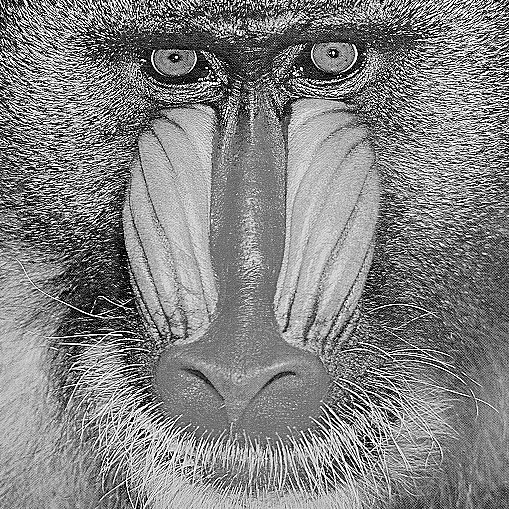

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kernel_sharpen=np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

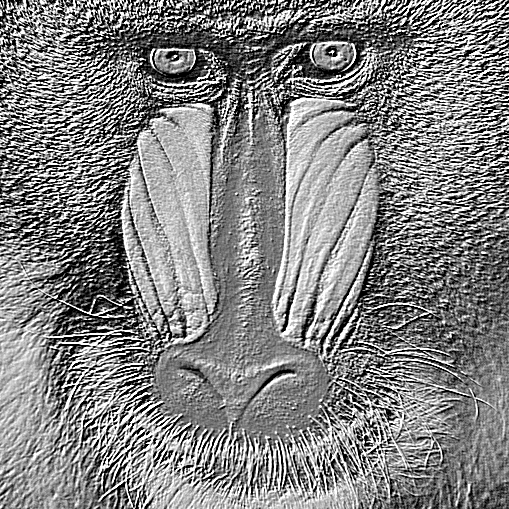

In [15]:
kernel_emboss=np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

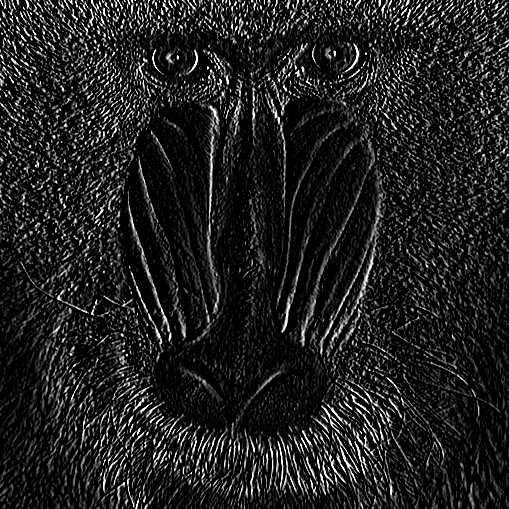

In [16]:
kernel_SOBEL=np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
cv2_imshow(convolution2d(img_gray, kernel_SOBEL, 1, 2))

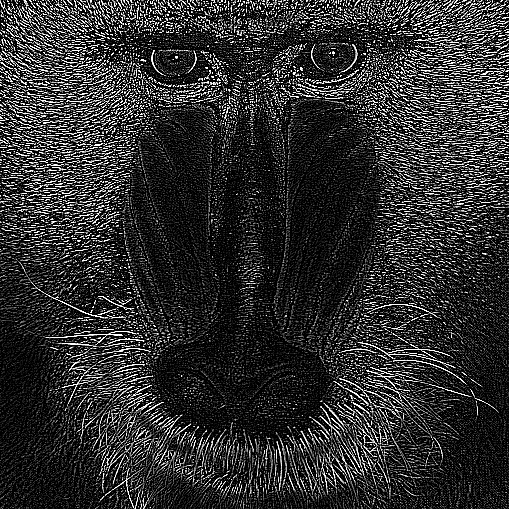

In [17]:
kernel_CANNY=np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, kernel_CANNY, 1, 2))

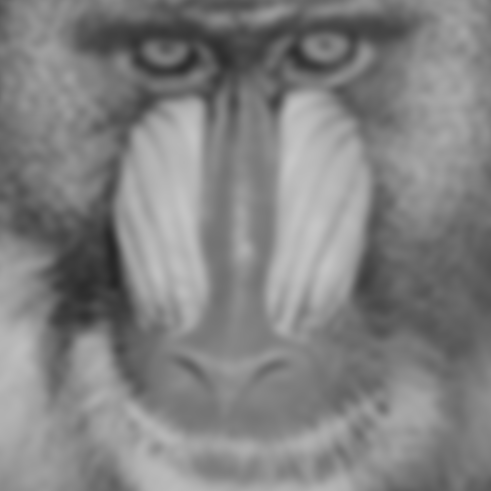

In [18]:
kernel_size=21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))